# Dataset Arbol Decisión

### winequality-red

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [102]:
# Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [103]:
# Cargar la data
dfVino = pd.read_csv('G:/Mi unidad/PUBLIC/UNAD/Semestres/S6/AnalisisDeDatos/T3_Trabajo_COL_17042024/ArbolesDecision/winequality-red.csv')

In [104]:
# Realizar lectura de los Datos para el análisis exploratorio
dfVino.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
print(dfVino.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [106]:
# Se define un nuevo conjunto de nombres para las columnas
columnasEspanol = {'fixed acidity': 'acidezFija', 'volatile acidity':'acidezVolatil', 'citric acid': 'acidoCitrico', 
                   'residual sugar': 'azucarResidual','chlorides':'cloruros' ,'free sulfur dioxide': 'dioxidoDeAzufreLibre',
                   'total sulfur dioxide':'dioxidoDeAzufreTotal', 'density':'densidad', 'pH':'ph', 'sulphates':'sulfatos', 
                   'alcohol':'alcohol', 'quality':'calidad'}

In [107]:
# Se renombran las columnas
dfVino = dfVino.rename(columns=columnasEspanol)

In [108]:
# confirmar el cambio en los encabezados de columna
dfVino.head(20)

,acidezFija,acidezVolatil,acidoCitrico,azucarResidual,cloruros,dioxidoDeAzufreLibre,dioxidoDeAzufreTotal,densidad,ph,sulfatos,alcohol,calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


###

Descripción de las variables:

- Acidez fija: Se refiere a la cantidad de ácidos no volátiles presentes en el vino. Estos ácidos contribuyen a la percepción del sabor y a la estabilidad del vino.

- Acidez volátil: Es la cantidad de ácidos volátiles presentes en el vino. Un nivel alto de acidez volátil puede contribuir a aromas no deseados, como el vinagre.

- Ácido cítrico: Es un tipo de ácido orgánico presente en el vino que puede afectar su sabor y acidez.

- Azúcar residual: Es la cantidad de azúcar que queda en el vino después de la fermentación. Un nivel alto de azúcar residual puede dar lugar a un vino más dulce.

- Cloruros: Son sales de cloro que pueden estar presentes en el vino. La concentración de cloruros puede afectar al sabor y la calidad del vino.

- Dióxido de azufre libre: Es una forma de azufre utilizada en la vinificación para prevenir la oxidación y el crecimiento microbiano no deseado.

- Dióxido de azufre total: Es la suma del dióxido de azufre libre y el dióxido de azufre ligado. También se utiliza como conservante en el vino.

- Densidad: Es la masa por unidad de volumen del vino. La densidad puede estar relacionada con la concentración de azúcar y alcohol en el vino.

- pH: Es una medida de la acidez o alcalinidad del vino. Un pH bajo indica mayor acidez, mientras que un pH alto indica menor acidez.

- Sulfatos: Son sales de ácido sulfúrico que pueden añadirse al vino como conservantes.

- Alcohol: Es el componente del vino que se produce mediante la fermentación de los azúcares presentes en la uva. El nivel de alcohol puede influir en el sabor, la textura y la sensación en boca del vino.

- Calidad: Se refiere a la evaluación global del vino, que puede basarse en diversos factores como el sabor, el aroma, la textura y la estructura. La calidad puede ser subjetiva y puede variar según los gustos individuales y los estándares de cada persona.


In [109]:
# Descripción de los datos en las columnas
dfVino.describe()

,acidezFija,acidezVolatil,acidoCitrico,azucarResidual,cloruros,dioxidoDeAzufreLibre,dioxidoDeAzufreTotal,densidad,ph,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [110]:
# Validar el copntenido de las columnas
dfVino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidezFija            1599 non-null   float64
 1   acidezVolatil         1599 non-null   float64
 2   acidoCitrico          1599 non-null   float64
 3   azucarResidual        1599 non-null   float64
 4   cloruros              1599 non-null   float64
 5   dioxidoDeAzufreLibre  1599 non-null   float64
 6   dioxidoDeAzufreTotal  1599 non-null   float64
 7   densidad              1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulfatos              1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  calidad               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


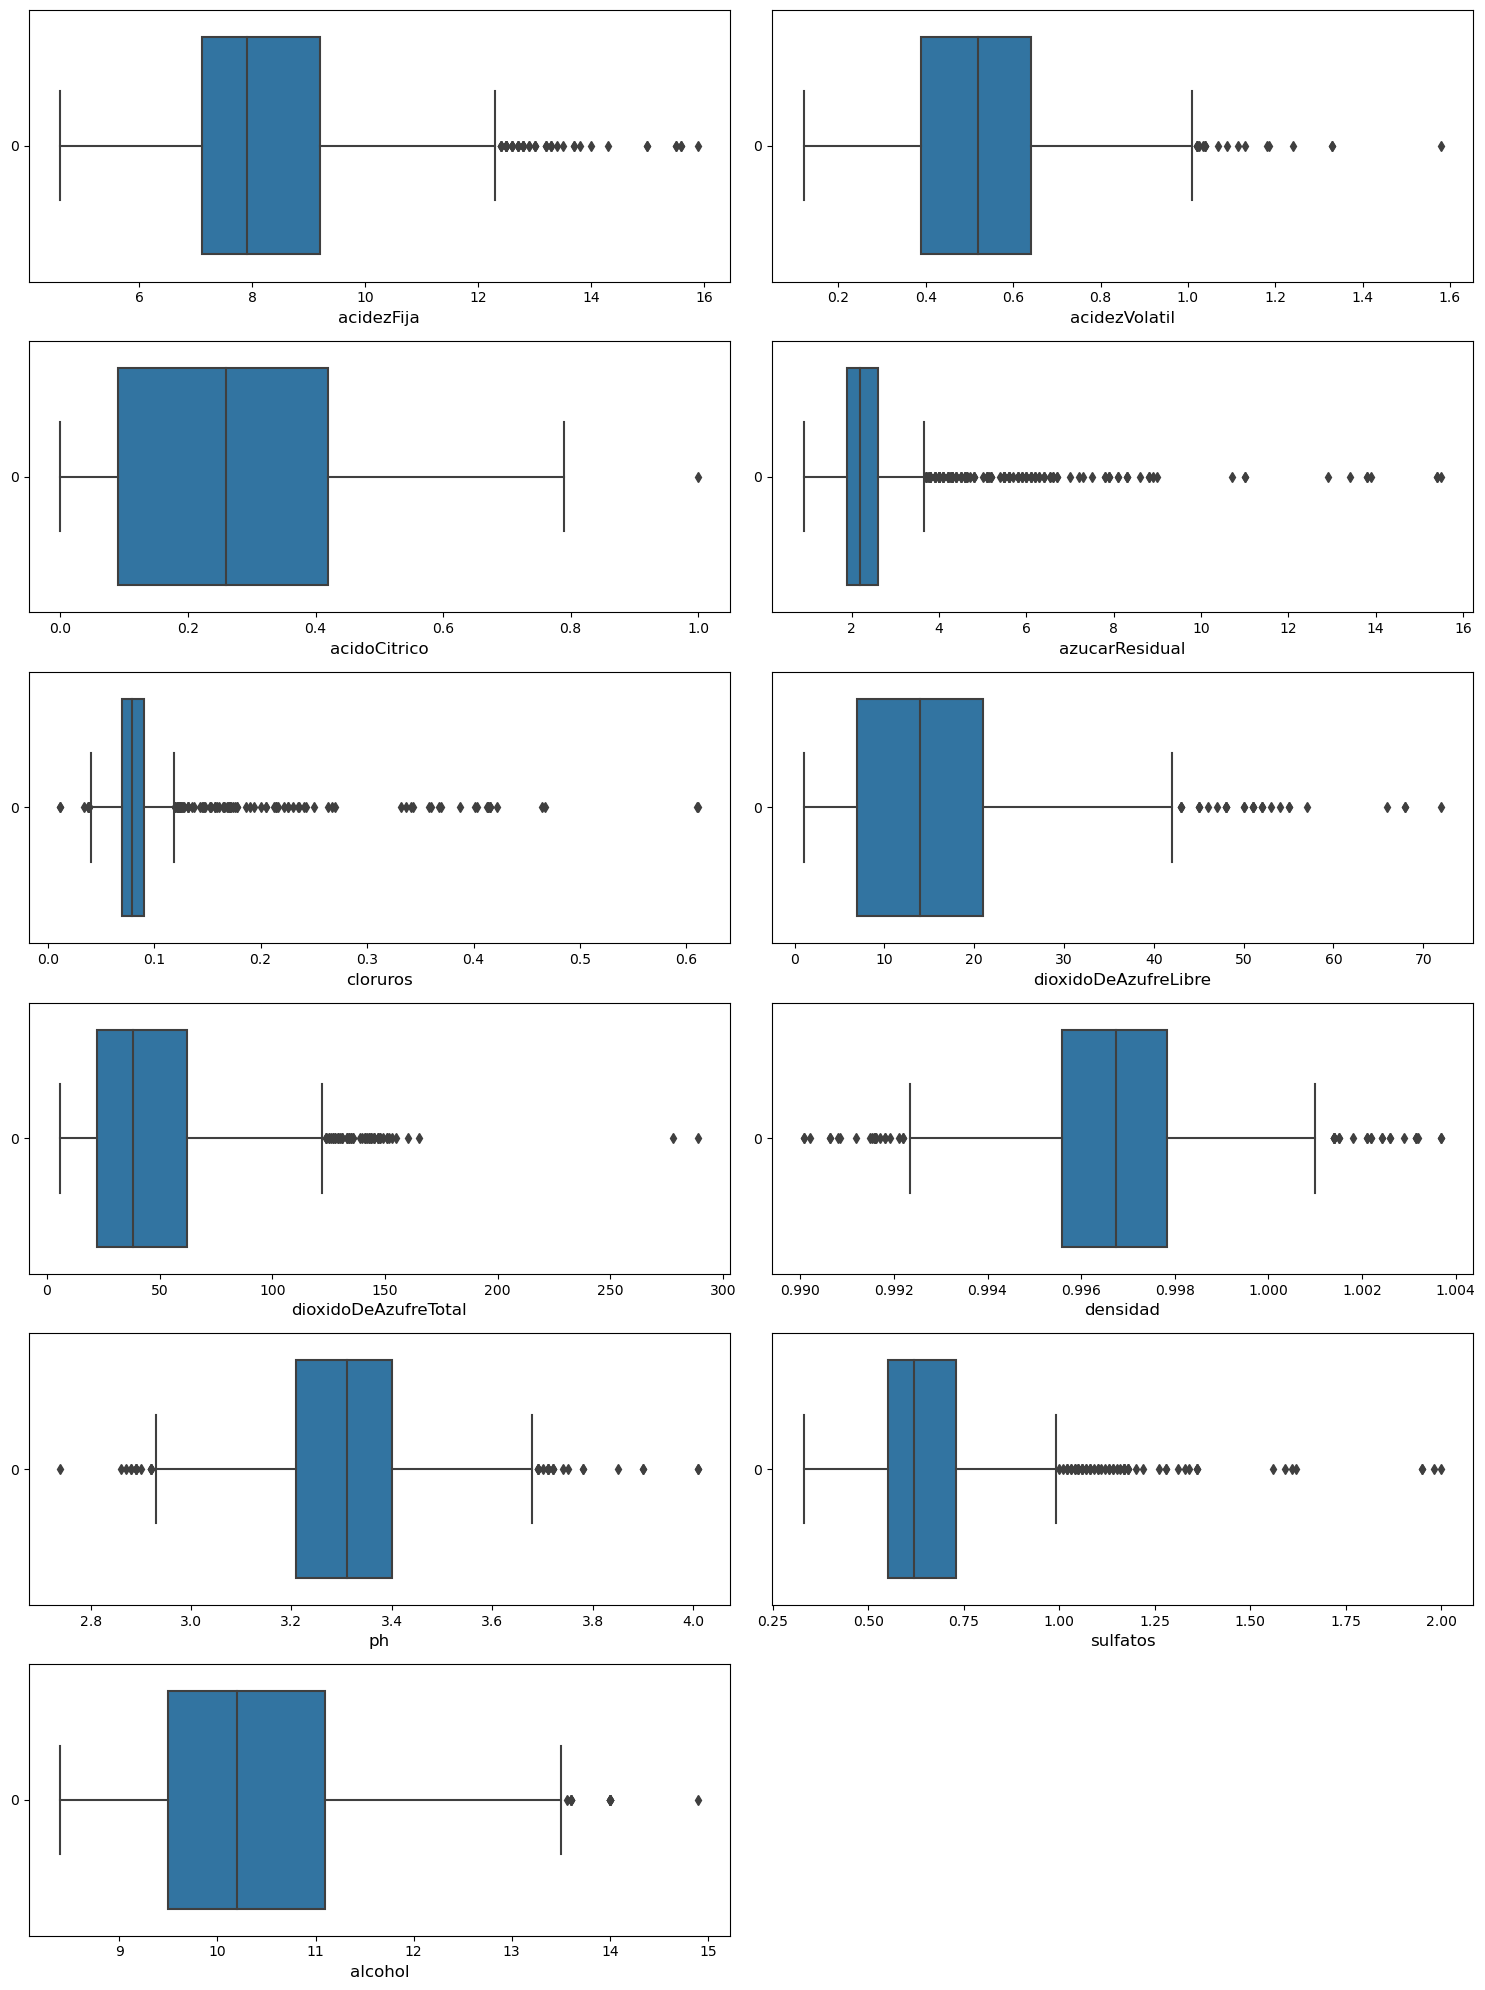

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 2, figsize=(15, 20))  # Mantenemos la disposición de filas y columnas

# Crear boxplot para 'acidezFija'
sns.boxplot(dfVino['acidezFija'], ax=axs[0, 0], orient='h')
axs[0, 0].set_xlabel('acidezFija', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'acidezVolatil'
sns.boxplot(dfVino['acidezVolatil'], ax=axs[0, 1], orient='h')
axs[0, 1].set_xlabel('acidezVolatil', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'acidoCitrico'
sns.boxplot(dfVino['acidoCitrico'], ax=axs[1, 0], orient='h')
axs[1, 0].set_xlabel('acidoCitrico', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'azucarResidual'
sns.boxplot(dfVino['azucarResidual'], ax=axs[1, 1], orient='h')
axs[1, 1].set_xlabel('azucarResidual', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'cloruros'
sns.boxplot(dfVino['cloruros'], ax=axs[2, 0], orient='h')
axs[2, 0].set_xlabel('cloruros', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'dioxidoDeAzufreLibre'
sns.boxplot(dfVino['dioxidoDeAzufreLibre'], ax=axs[2, 1], orient='h')
axs[2, 1].set_xlabel('dioxidoDeAzufreLibre', fontsize=12)  # Cambiamos a 'xlabel'

# Crear histograma para 'dioxidoDeAzufreTotal'
sns.boxplot(dfVino['dioxidoDeAzufreTotal'], ax=axs[3, 0], orient='h')
axs[3, 0].set_xlabel('dioxidoDeAzufreTotal', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'densidad'
sns.boxplot(dfVino['densidad'], ax=axs[3, 1], orient='h')
axs[3, 1].set_xlabel('densidad', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'ph'
sns.boxplot(dfVino['ph'], ax=axs[4, 0], orient='h')
axs[4, 0].set_xlabel('ph', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'sulfatos'
sns.boxplot(dfVino['sulfatos'], ax=axs[4, 1], orient='h')
axs[4, 1].set_xlabel('sulfatos', fontsize=12)  # Cambiamos a 'xlabel'

# Crear histograma para 'alcohol'
sns.boxplot(dfVino['alcohol'], ax=axs[5, 0], orient='h')
axs[5, 0].set_xlabel('alcohol', fontsize=12)  # Cambiamos a 'xlabel'

# Eliminar el último eje, ya que no se utiliza
fig.delaxes(axs[5, 1])

plt.tight_layout()
plt.show()



##### Variable acidezVolatil

In [112]:
#Conteo de Datos Atípicos - acidezVolatil

# nivel_minimo=
nivel_maximo=1.2
Total_Atipicos=((dfVino['acidezVolatil']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 4


In [113]:
# Filtra Datos Atípicos - acidezVolatil

dfVino=dfVino[(dfVino['acidezVolatil']<nivel_maximo)]

In [114]:
#Conteo de Datos Atípicos - acidezVolatil

# nivel_minimo=
nivel_maximo=1.2
Total_Atipicos=((dfVino['acidezVolatil']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


##### Variable acidoCitrico

In [115]:
#Conteo de Datos Atípicos - acidoCitrico

# nivel_minimo=
nivel_maximo=0.8
Total_Atipicos=((dfVino['acidoCitrico']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [116]:
# Filtra Datos Atípicos - acidoCitrico

dfVino=dfVino[(dfVino['acidoCitrico']<nivel_maximo)]

In [117]:
#Conteo de Datos Atípicos - acidoCitrico

# nivel_minimo=
nivel_maximo=0.8
Total_Atipicos=((dfVino['acidoCitrico']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


##### Variable azucarResidual

In [118]:
#Conteo de Datos Atípicos - azucarResidual

# nivel_minimo=
nivel_maximo=10
Total_Atipicos=((dfVino['azucarResidual']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 11


In [119]:
# Filtra Datos Atípicos - azucarResidual

dfVino=dfVino[(dfVino['azucarResidual']<nivel_maximo)]

In [120]:
#Conteo de Datos Atípicos - azucarResidual

# nivel_minimo=
nivel_maximo=10
Total_Atipicos=((dfVino['azucarResidual']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


##### Variable cloruros

In [121]:
#Conteo de Datos Atípicos - cloruros

# nivel_minimo=
nivel_maximo=0.4
Total_Atipicos=((dfVino['cloruros']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 12


In [122]:
# Filtra Datos Atípicos - cloruros

dfVino=dfVino[(dfVino['cloruros']<nivel_maximo)]

In [123]:
#Conteo de Datos Atípicos - cloruros

# nivel_minimo=
nivel_maximo=0.4
Total_Atipicos=((dfVino['cloruros']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


##### Variable dioxidoDeAzufreTotal

In [124]:
#Conteo de Datos Atípicos - dioxidoDeAzufreTotal

# nivel_minimo=
nivel_maximo=200
Total_Atipicos=((dfVino['dioxidoDeAzufreTotal']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [125]:
# Filtra Datos Atípicos - dioxidoDeAzufreTotal

dfVino=dfVino[(dfVino['dioxidoDeAzufreTotal']<nivel_maximo)]

In [126]:
#Conteo de Datos Atípicos - dioxidoDeAzufreTotal

# nivel_minimo=
nivel_maximo=200
Total_Atipicos=((dfVino['dioxidoDeAzufreTotal']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


##### Variable sulfatos

In [127]:
#Conteo de Datos Atípicos - sulfatos

# nivel_minimo=
nivel_maximo=1.75
Total_Atipicos=((dfVino['sulfatos']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [128]:
# Filtra Datos Atípicos - sulfatos

dfVino=dfVino[(dfVino['sulfatos']<nivel_maximo)]

In [129]:
#Conteo de Datos Atípicos - sulfatos

# nivel_minimo=
nivel_maximo=1.75
Total_Atipicos=((dfVino['sulfatos']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


##### Variable alcohol

In [130]:
#Conteo de Datos Atípicos - alcohol

# nivel_minimo=
nivel_maximo=14
Total_Atipicos=((dfVino['alcohol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [131]:
# Filtra Datos Atípicos - alcohol

dfVino=dfVino[(dfVino['alcohol']<nivel_maximo)]

In [132]:
#Conteo de Datos Atípicos - alcohol

# nivel_minimo=
nivel_maximo=14
Total_Atipicos=((dfVino['alcohol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [133]:
#Revisión del tipo de datos y datos faltantes

dfVino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidezFija            1558 non-null   float64
 1   acidezVolatil         1558 non-null   float64
 2   acidoCitrico          1558 non-null   float64
 3   azucarResidual        1558 non-null   float64
 4   cloruros              1558 non-null   float64
 5   dioxidoDeAzufreLibre  1558 non-null   float64
 6   dioxidoDeAzufreTotal  1558 non-null   float64
 7   densidad              1558 non-null   float64
 8   ph                    1558 non-null   float64
 9   sulfatos              1558 non-null   float64
 10  alcohol               1558 non-null   float64
 11  calidad               1558 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 158.2 KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### Caracteristica de interes:

- calidad: calidad obtenida de acuerdo con las demas variables

In [134]:
# Total de vinos por calidad

dfVino['calidad'].value_counts()

calidad
5    664
6    622
7    196
4     51
8     16
3      9
Name: count, dtype: int64

In [135]:
dfVino[['calidad']].head(15)

,calidad
0,5
1,5
2,5
3,6
4,5
5,5
6,5
7,7
8,7
9,5



# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

##### División

In [136]:
# Se crean variables X y Y para almacenar la información del entrenamiento
x = dfVino.iloc[:,0:11].values
y = dfVino.iloc[:,11].values

In [137]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# Se utiliza la función train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [138]:
# Entrenamiento del arbol de decisión
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [139]:
print (x_train)

[[ 7.7    0.775  0.42  ...  3.23   0.59   9.5  ]
 [ 6.2    0.39   0.43  ...  3.45   0.87  11.2  ]
 [ 7.     0.685  0.    ...  3.6    0.81   9.9  ]
 ...
 [ 7.4    0.55   0.19  ...  3.49   0.68  10.5  ]
 [ 8.8    0.44   0.49  ...  3.3    0.6    9.5  ]
 [ 7.     0.78   0.08  ...  3.4    0.47  10.   ]]


In [140]:
print (y_train)

[5 7 5 ... 5 5 5]


In [141]:
y_pred = classifier.predict(x_test)

In [142]:
y_pred

array([7, 7, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 4, 7, 6, 6, 6,
       7, 5, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 6, 5, 7, 6, 7, 5, 7, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 7, 6, 5, 5, 6, 5, 7, 6, 6, 5,
       5, 6, 7, 7, 7, 6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 5, 7, 6, 6, 5, 5, 7, 6, 7, 5, 5, 6, 7, 7, 6, 5, 6, 6, 5,
       7, 7, 6, 6, 5, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 7, 7, 6, 5, 5, 6, 7,
       6, 6, 5, 5, 6, 5, 7, 5, 5, 5, 7, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 7, 7, 5, 5, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6,
       5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 7, 7, 6, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 7, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5,

In [143]:
y_test

array([7, 7, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6,
       7, 5, 6, 7, 7, 4, 7, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 8, 4, 6, 5, 5, 7, 7, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 7, 5, 6, 5, 7, 6, 5,
       5, 5, 5, 5, 7, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 7, 5, 6, 5,
       6, 5, 6, 7, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 4, 5, 6, 6, 4, 5, 5,
       6, 6, 6, 4, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 7, 7, 5, 6, 6, 6, 5,
       6, 7, 5, 6, 6, 7, 7, 8, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 6,
       7, 6, 5, 6, 5, 6, 6, 5, 5, 3, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 4, 6, 5, 7, 6, 5, 6, 4, 6, 6, 6, 4, 7, 7, 5, 5, 6, 5, 7,
       6, 6, 6, 6, 5, 5, 7, 5, 6, 5, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 7, 5, 4, 5, 6, 6, 5, 7, 5, 5, 5, 5, 3, 5,
       5, 7, 5, 8, 6, 7, 5, 6, 5, 6, 5, 6, 6, 6, 7, 7, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5,

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [144]:
# accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))


Accuracy:  0.5461538461538461
F1 Score:  0.5383045434098066
Recall:  0.5461538461538461


# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

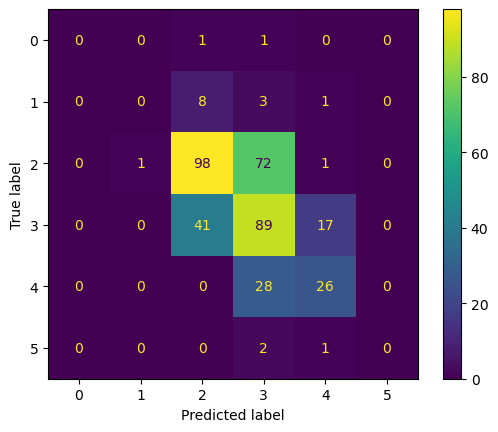

In [145]:
#Matrix de Confusión del modelo

cm=confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [146]:
from sklearn import tree
tree.export_graphviz(classifier, out_file = 'tree_social.dot')

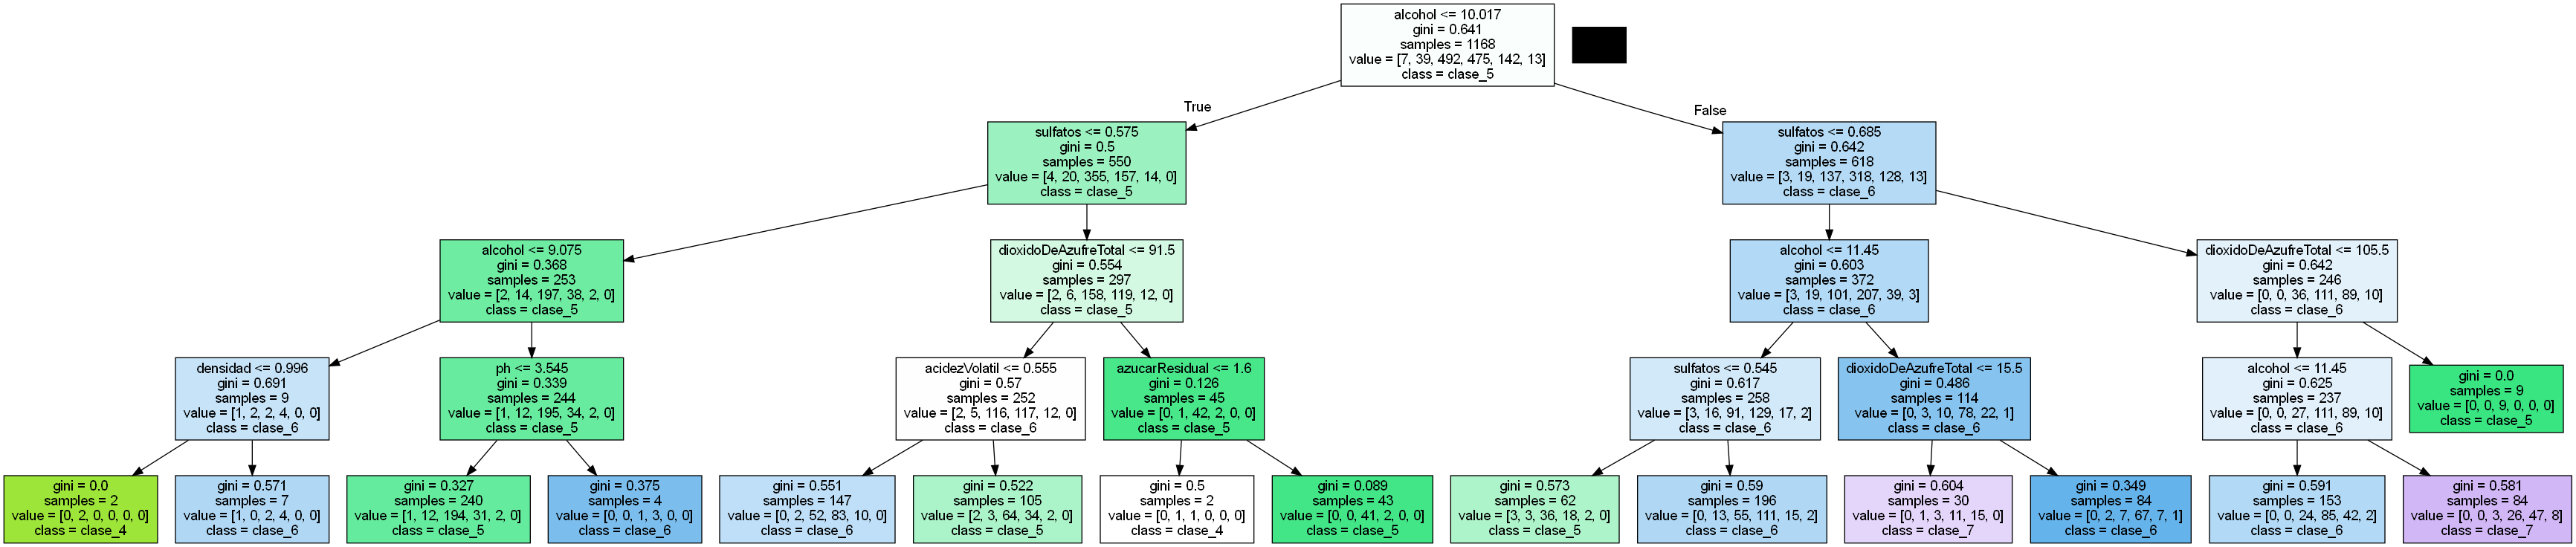

In [147]:
dot_data = tree.export_graphviz(classifier,
                                out_file=None,
                                class_names=['clase_3', 'clase_4', 'clase_5', 'clase_6', 'clase_7', 'clase_8'],
                                feature_names=['acidezFija', 'acidezVolatil', 'acidoCitrico', 'azucarResidual', 'cloruros', 'dioxidoDeAzufreLibre', 'dioxidoDeAzufreTotal', 'densidad', 'ph', 'sulfatos', 'alcohol'],
                                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [148]:
#graph.write_png("1ro.png")

# 8. Interpretar, analizar y documentar los resultados obtenidos

###

Del desempeño del modelo se puede describir:

Precisión:
La precisión del modelo es del 54.61%, lo que indica que el modelo es capaz de clasificar correctamente alrededor del 54.61% de las instancias en las clases correctas. Si bien no es una precisión muy alta, sigue siendo significativa y puede ser útil en ciertas aplicaciones.

Balanceado Recall y Precisión:
El recall del modelo es del 54.61%, lo que significa que es capaz de identificar correctamente alrededor del 54.61% de todas las instancias positivas en los datos. Esto sugiere que el modelo no está sesgado hacia ninguna clase en particular y es capaz de detectar instancias de todas las clases de manera equilibrada.

Desempeño Aceptable en Clases Minoritarias:
Observamos que el modelo es capaz de clasificar correctamente algunas instancias de las clases minoritarias (por ejemplo, clase 3 y clase 8), como se muestra en la matriz de confusión. Esto sugiere que el modelo no está sesgado hacia las clases dominantes y puede generalizar bien incluso en clases con menos datos.


# 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/